<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/03_Confidence_Interval_SST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# 1. Load the ERSSTv5 dataset from xarray tutorial
ds = xr.tutorial.open_dataset("ersstv5")

# 2. Calculate global mean SST to create a 1D time series
# Using area-weighted mean for accuracy in climate data
weights = np.cos(np.deg2rad(ds.lat))
weights.name = "weights"
sst_ts = ds.sst.weighted(weights).mean(dim=["lat", "lon"])

# Drop any NaNs just in case
sst_ts = sst_ts.dropna(dim='time')

In [4]:
# 3. Define the "True Population" (All available months from 1970 to 2021)
pop_mean = float(sst_ts.mean().values)
pop_std = float(sst_ts.std().values)  # True sigma (σ)

In [13]:
# 4. Take a random sample (n = 48 months)
n = 48
np.random.seed(50) # For reproducibility
random_indices = np.random.choice(len(sst_ts.time), size=n, replace=False)
sample_sst = sst_ts.isel(time=random_indices)

sample_mean = float(sample_sst.mean().values)
sample_std = float(sample_sst.std(ddof=1).values) # Sample std (s)

In [14]:
# 5. Calculate Confidence Intervals (95%)
confidence_level = 0.95
alpha = 1 - confidence_level

In [15]:
# --- Z-Interval (Using TRUE Population Standard Deviation σ) ---
z_critical = stats.norm.ppf(1 - alpha/2)
margin_error_z = z_critical * (pop_std / np.sqrt(n))
ci_z_lower = sample_mean - margin_error_z
ci_z_upper = sample_mean + margin_error_z

In [16]:
# --- t-Interval (Using SAMPLE Standard Deviation s) ---
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
margin_error_t = t_critical * (sample_std / np.sqrt(n))
ci_t_lower = sample_mean - margin_error_t
ci_t_upper = sample_mean + margin_error_t

In [17]:
# Print results
print(f"Population Mean (μ): {pop_mean:.3f} °C")
print(f"Population Std (σ): {pop_std:.3f} °C")
print(f"---")
print(f"Sample Mean (x̄): {sample_mean:.3f} °C")
print(f"Sample Std (s): {sample_std:.3f} °C")
print(f"---")
print(f"95% Z-Interval (Known σ): [{ci_z_lower:.3f}, {ci_z_upper:.3f}] °C")
print(f"95% t-Interval (Unknown σ): [{ci_t_lower:.3f}, {ci_t_upper:.3f}] °C")

Population Mean (μ): 18.188 °C
Population Std (σ): 0.236 °C
---
Sample Mean (x̄): 18.168 °C
Sample Std (s): 0.245 °C
---
95% Z-Interval (Known σ): [18.101, 18.235] °C
95% t-Interval (Unknown σ): [18.097, 18.239] °C


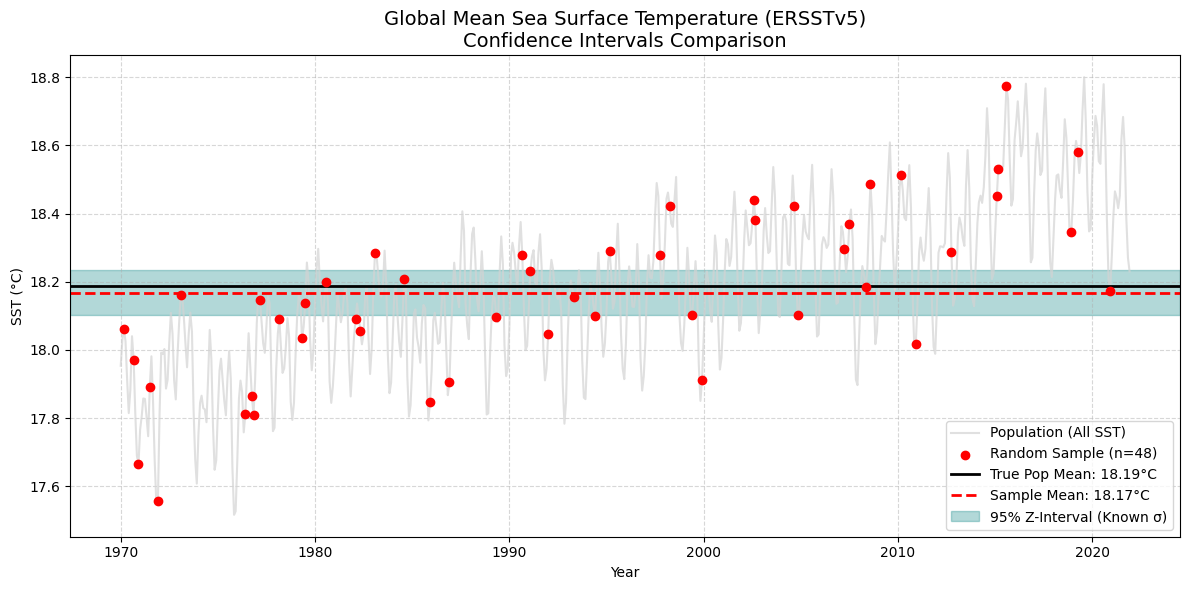

In [18]:
# 6. Visualization
plt.figure(figsize=(12, 6))

# Plot the full time series
sst_ts.plot(color='lightgray', label='Population (All SST)', alpha=0.7)

# Highlight the random sample points
plt.scatter(sample_sst.time.values, sample_sst.values, color='red', zorder=5, label=f'Random Sample (n={n})')

# Draw horizontal lines for Mean and CIs
plt.axhline(pop_mean, color='black', linestyle='-', lw=2, label=f'True Pop Mean: {pop_mean:.2f}°C')
plt.axhline(sample_mean, color='red', linestyle='--', lw=2, label=f'Sample Mean: {sample_mean:.2f}°C')

# Shade the Z-Interval
plt.axhspan(ci_z_lower, ci_z_upper, color='teal', alpha=0.3, label='95% Z-Interval (Known σ)')

plt.title('Global Mean Sea Surface Temperature (ERSSTv5)\nConfidence Intervals Comparison', fontsize=14)
plt.ylabel('SST (°C)')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

In [12]:
ds.time

<xarray.DataArray 'time' (time: 624)> Size: 5kB
array(['1970-01-01T00:00:00.000000000', '1970-02-01T00:00:00.000000000',
       '1970-03-01T00:00:00.000000000', ..., '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2021-12-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 81204.]

In [19]:
# WHAT IF WE SELECT ONLY FIRST 4 YEARS

Population Mean (μ): 18.188 °C
Population Std (σ): 0.236 °C
---
Sample Mean (x̄): 17.907 °C
Sample Std (s): 0.155 °C
---
95% Z-Interval (Known σ): [17.840, 17.973] °C
95% t-Interval (Unknown σ): [17.861, 17.952] °C


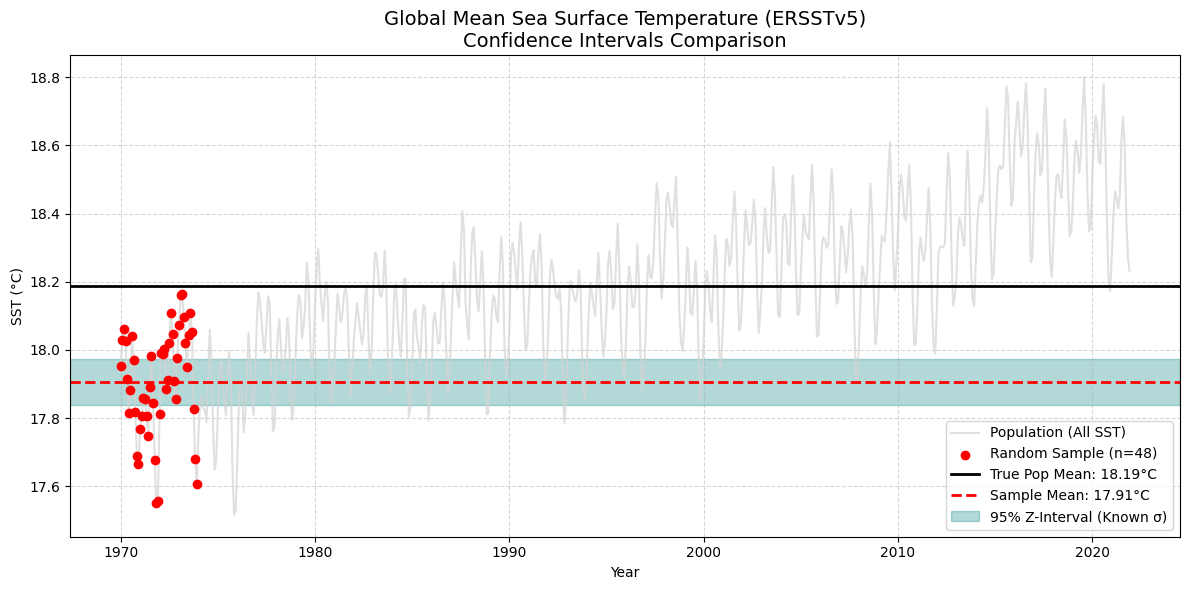

In [21]:
# 4. Take the firs 48 months
sample_sst = sst_ts.isel(time=slice(0,48))

sample_mean = float(sample_sst.mean().values)
sample_std = float(sample_sst.std(ddof=1).values) # Sample std (s)

# 5. Calculate Confidence Intervals (95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# --- Z-Interval (Using TRUE Population Standard Deviation σ) ---
z_critical = stats.norm.ppf(1 - alpha/2)
margin_error_z = z_critical * (pop_std / np.sqrt(n))
ci_z_lower = sample_mean - margin_error_z
ci_z_upper = sample_mean + margin_error_z

# --- t-Interval (Using SAMPLE Standard Deviation s) ---
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
margin_error_t = t_critical * (sample_std / np.sqrt(n))
ci_t_lower = sample_mean - margin_error_t
ci_t_upper = sample_mean + margin_error_t

# Print results
print(f"Population Mean (μ): {pop_mean:.3f} °C")
print(f"Population Std (σ): {pop_std:.3f} °C")
print(f"---")
print(f"Sample Mean (x̄): {sample_mean:.3f} °C")
print(f"Sample Std (s): {sample_std:.3f} °C")
print(f"---")
print(f"95% Z-Interval (Known σ): [{ci_z_lower:.3f}, {ci_z_upper:.3f}] °C")
print(f"95% t-Interval (Unknown σ): [{ci_t_lower:.3f}, {ci_t_upper:.3f}] °C")

# 6. Visualization
plt.figure(figsize=(12, 6))

# Plot the full time series
sst_ts.plot(color='lightgray', label='Population (All SST)', alpha=0.7)

# Highlight the random sample points
plt.scatter(sample_sst.time.values, sample_sst.values, color='red', zorder=5, label=f'Random Sample (n={n})')

# Draw horizontal lines for Mean and CIs
plt.axhline(pop_mean, color='black', linestyle='-', lw=2, label=f'True Pop Mean: {pop_mean:.2f}°C')
plt.axhline(sample_mean, color='red', linestyle='--', lw=2, label=f'Sample Mean: {sample_mean:.2f}°C')

# Shade the Z-Interval
plt.axhspan(ci_z_lower, ci_z_upper, color='teal', alpha=0.3, label='95% Z-Interval (Known σ)')

plt.title('Global Mean Sea Surface Temperature (ERSSTv5)\nConfidence Intervals Comparison', fontsize=14)
plt.ylabel('SST (°C)')
plt.xlabel('Year')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3249857008.py:46: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f'Monte Carlo Estimation of $\pi$\nEstimate: {pi_estimate:.4f}', fontsize=16)


Total points (N): 1000
Points inside circle: 760
Estimated Pi: 3.040000
Actual Pi:    3.141593


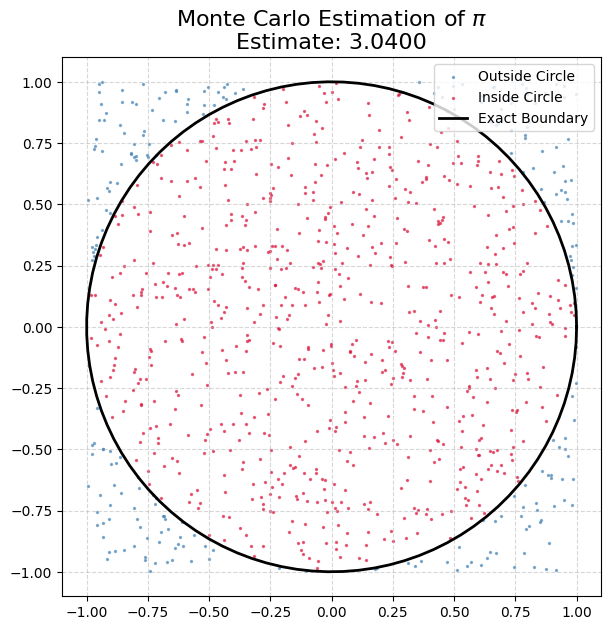

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# --- Draw the exact circle ---
# Create 100 evenly spaced angles from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates using cosine and sine
exact_x = np.cos(theta)
exact_y = np.sin(theta)

# 1. Set the number of random points (darts)
N = 1000

# 2. Generate random x and y coordinates between -1 and 1
# This perfectly fills a 2x2 square centered at (0,0)
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# 3. Calculate the distance squared from the origin (0,0)
# Equation of a circle: x^2 + y^2 = r^2. Here r = 1.
distance_squared = x**2 + y**2

# 4. Count how many points landed inside the circle (distance <= 1)
inside_circle = distance_squared <= 1
points_inside = np.sum(inside_circle)

# 5. Estimate Pi
pi_estimate = 4 * (points_inside / N)

print(f"Total points (N): {N}")
print(f"Points inside circle: {points_inside}")
print(f"Estimated Pi: {pi_estimate:.6f}")
print(f"Actual Pi:    {np.pi:.6f}")

# --- Visualization ---
plt.figure(figsize=(7, 7))

# Plot points outside the circle in blue, inside in red
plt.scatter(x[~inside_circle], y[~inside_circle], color='steelblue', s=2, alpha=0.6, label='Outside Circle')
plt.scatter(x[inside_circle], y[inside_circle], color='crimson', s=2, alpha=0.6, label='Inside Circle')
# Plot the circle as a distinct line (e.g., solid black or gold)
plt.plot(exact_x, exact_y, color='black', linewidth=2, label='Exact Boundary')

# Formatting to make it look like a perfect square and circle
plt.title(f'Monte Carlo Estimation of $\pi$\nEstimate: {pi_estimate:.4f}', fontsize=16)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal') # Crucial: forces the plot to be a square
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right')

plt.show()

In [27]:
from scipy.stats import norm

# 1. Calculate the sample proportion (p-hat)
p_hat = points_inside / N

# 2. Calculate the Standard Error of the proportion
se_proportion = np.sqrt((p_hat * (1 - p_hat)) / N)

# 3. Find the Z-critical value for 95% Confidence (approx 1.96)
z_critical = norm.ppf(0.975)

# 4. Calculate the Margin of Error for Pi (Don't forget to multiply by 4!)
moe_pi = 4 * (z_critical * se_proportion)

# 5. Calculate the Confidence Interval bounds
ci_lower = pi_estimate - moe_pi
ci_upper = pi_estimate + moe_pi

print(f"\n--- Statistical Inference ---")
print(f"Estimate for Pi: {pi_estimate:.5f}")
print(f"Margin of Error: ±{moe_pi:.5f}")
print(f"95% Confidence Interval: [{ci_lower:.5f}, {ci_upper:.5f}]")

# Check if the true value of Pi was captured
captured = ci_lower <= np.pi <= ci_upper
print(f"Did the 95% CI capture true Pi (3.14159...)? {'✅ YES' if captured else '❌ NO'}")


--- Statistical Inference ---
Estimate for Pi: 3.04000
Margin of Error: ±0.10588
95% Confidence Interval: [2.93412, 3.14588]
Did the 95% CI capture true Pi (3.14159...)? ✅ YES


In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display

# --- 1. Load the Dataset ---
print("Loading dataset...")
ds = xr.tutorial.open_dataset("air_temperature")

# Extract all temperature values into a flat, 1D array to represent our "Population"
# We drop any potential NaNs to avoid calculation errors
population = ds.air.values.flatten()
population = population[~np.isnan(population)]

# Calculate true population parameters
pop_mean = np.mean(population)
pop_std = np.std(population)

print(f"Population Size: {len(population):,} data points")
print(f"True Mean (μ): {pop_mean:.2f} K")
print(f"True Std Dev (σ): {pop_std:.2f} K\n")

# --- 2. Define the Interactive Function ---
def plot_clt_air_temp(sample_size, Ny):
    """
    Takes Ny separate samples of size 'sample_size' from the population,
    calculates the mean of each sample, and plots the distribution.
    """
    n_experiments = Ny  # We will draw Ny separate samples

    # Randomly select indices for our samples
    # Shape is (Ny experiments, sample_size per experiment)
    random_indices = np.random.randint(0, len(population), size=(n_experiments, sample_size))

    # Extract the actual temperature values using the indices
    samples = population[random_indices]

    # Calculate the mean for each of the Ny experiments
    sample_means = np.mean(samples, axis=1)
    print(f"Sample Mean (X): {sample_means.mean():.2f} K")
    print(f"Sample Standard deviation (S): {sample_means.std():.2f} K")

    # --- Plotting ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Left Plot: The Raw Population Distribution
    axes[0].hist(population, bins=60, density=True, color='lightgray', edgecolor='white')
    axes[0].axvline(pop_mean, color='black', linestyle='--', label=f'True Mean ({pop_mean:.1f} K)')
    axes[0].set_title('1. Underlying Population (Bimodal)', fontsize=14)
    axes[0].set_xlabel('Air Temperature (K)', fontsize=12)
    axes[0].set_ylabel('Density', fontsize=12)
    axes[0].legend()

    # Right Plot: The Distribution of Sample Means
    axes[1].hist(sample_means, bins=40, density=True, color='coral',
                 edgecolor='white', alpha=0.8, label=f'Sample Means (n={sample_size})')

    # Calculate and plot the Theoretical Gaussian (Normal) Curve
    # CLT says standard error = pop_std / sqrt(sample_size)
    standard_error = pop_std / np.sqrt(sample_size)

    # Dynamically set x-axis limits based on the theoretical spread
    x_min = pop_mean - 4 * standard_error
    x_max = pop_mean + 4 * standard_error
    x = np.linspace(x_min, x_max, 200)

    y_theoretical = norm.pdf(x, pop_mean, standard_error)
    axes[1].plot(x, y_theoretical, 'k-', lw=3, label='Theoretical Gaussian')

    axes[1].set_title(f'2. Central Limit Theorem: Averaging $n={sample_size}$', fontsize=14)
    axes[1].set_xlabel('Sample Mean Temperature (K)', fontsize=12)
    axes[1].set_xlim(x_min, x_max) # Lock limits to show the curve clearly
    axes[1].legend()
    axes[1].grid(True, linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

    #print(f"True Std Dev (σ): {pop_std:.2f} K\n")

# --- 3. Create the Interactive Slider ---
clt_slider = widgets.IntSlider(
    value=2,           # Start at n=2 to show it's initially messy
    min=1,             # Minimum sample size of 1
    max=100,           # Maximum sample size
    step=1,
    description='Sample Size (n):',
    style={'description_width': 'initial'},
    continuous_update=False  # Only updates the plot when you release the mouse
)

# --- 4. Create the Interactive Slider ---
clt_slider2 = widgets.IntSlider(
    value=30,           # Start at n=30
    min=30,             # Minimum Number of Draws
    max=3000,           # Maximum Number of Draws
    step=10,
    description='Number of Draws (Ny):',
    style={'description_width': 'initial'},
    continuous_update=False  # Only updates the plot when you release the mouse
)

# Render the widget
widgets.interact(plot_clt_air_temp, sample_size=clt_slider, Ny=clt_slider2);

Loading dataset...
Population Size: 3,869,000 data points
True Mean (μ): 281.26 K
True Std Dev (σ): 16.32 K



interactive(children=(IntSlider(value=2, continuous_update=False, description='Sample Size (n):', min=1, style…